<a href="https://colab.research.google.com/github/rohitghosh11/ME592/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from os import listdir
from PIL import Image as PImage
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import glob
imageList=[]


patchRoot=os.path.join("/content/drive/MyDrive/eia/leaves","transformed")
if not os.path.exists(patchRoot):
    os.makedirs(patchRoot)

for filename in glob.glob('/content/drive/MyDrive/eia/leaves/*.png'):
	print (filename)
	image = load_img(filename)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)

	# construct the image generator for data augmentation then
	# initialize the total number of images generated thus far
	aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=[0.2,0.8],
  rescale=1./255,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0,
	horizontal_flip=True,
	)
	total = 0

	# construct the actual Python generator
	print("[INFO] generating images...")
	imageGen = aug.flow(image, batch_size=1, save_to_dir= patchRoot,
		save_prefix="img", save_format="png")

	# loop over examples from our image data augmentation generator
	for image in imageGen:
		# increment our counter
		total += 1

		# if we have reached 10 examples, break from the loop
		if total == 13:
			break

/content/drive/MyDrive/eia/leaves/I7.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I6.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I3.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I4.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I5.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I8.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I1.png
[INFO] generating images...
/content/drive/MyDrive/eia/leaves/I2.png
[INFO] generating images...


In [14]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
 
resizedSize=32
patchSize=32
maxPatchNum=5
 
imgRoot="/content/drive/MyDrive/eia/leaves/*.png"
imgList=sorted(glob.glob(imgRoot))
imgNum=len(imgList)
print(imgNum)

patchRoot=os.path.join("/content/drive/MyDrive/eia/leaves","patches")
if not os.path.exists(patchRoot):
    os.makedirs(patchRoot)

for imgInd in range(imgNum):
        curImg=Image.open(imgList[imgInd])
        curImgar=np.array(curImg)
        curPatches=image.extract_patches_2d(curImgar,(patchSize,patchSize),max_patches=5,random_state=1)
        print("Extracting patches from {}-th image...".format(imgInd))
        for patchInd in range(5):
            patchName="{:05d}.png".format(imgInd*maxPatchNum+patchInd+1)
            plt.imsave(os.path.join(patchRoot,patchName),curPatches[patchInd])
print("Image patch extraction [Done].")

8
Extracting patches from 0-th image...
Extracting patches from 1-th image...
Extracting patches from 2-th image...
Extracting patches from 3-th image...
Extracting patches from 4-th image...
Extracting patches from 5-th image...
Extracting patches from 6-th image...
Extracting patches from 7-th image...
Image patch extraction [Done].


In [16]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import PIL
import numpy as np
import torch
import torchvision
filelist = glob.glob('/content/drive/MyDrive/eia/leaves/patches/*.png')
X = np.array([cv2.imread(fname) for fname in filelist])
X.shape
X = X.reshape(-1, X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)
X_norm = X / 255
print ('X.min()', X_norm.min())
print ('X.max()', X_norm.max())

(40, 3072)
X.min() 0.03529411764705882
X.max() 0.9254901960784314


In [17]:
X_norm.mean(axis=0).shape
X_norm.mean(axis=0)

array([0.27      , 0.40460784, 0.31980392, ..., 0.28960784, 0.43852941,
       0.33715686])

In [18]:
X_norm = X_norm - X_norm.mean(axis=0)
X_norm.mean(axis=0)

array([ 9.71445147e-17, -5.13478149e-17,  3.95516953e-17, ...,
        1.08246745e-16,  4.57966998e-17,  1.11022302e-16])

In [19]:
sigma = np.cov(X_norm, rowvar = False)

In [21]:
U,S,V = np.linalg.svd(sigma)

In [22]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

In [23]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


In [24]:
def plotImage(X):
    plt.figure(figsize=(2.5, 2.5))
    plt.imshow(X.reshape(32,32,3))
    plt.grid(None)
    plt.show()
    plt.close()

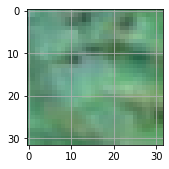

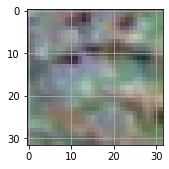

In [25]:
plotImage(X[0, :])
plotImage(X_ZCA_rescaled[0, :])

In [27]:
X_c = X.reshape(40960,3)

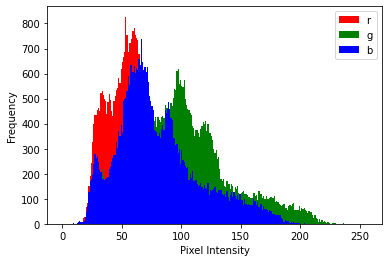

In [28]:
X0 = X_c[:,0]
X1 = X_c[:,1]
X2 = X_c[:,2]
plt.hist(X0,256,[0,256], color = 'r',label = 'r')
plt.hist(X1,256,[0,256], color = 'g', label = 'g')
plt.hist(X2,256,[0,256], color = 'b', label ='b')
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Pixel Intensity")
plt.show()

In [30]:
X_ZCA_c = X_ZCA_rescaled.reshape(40960,3)
X_ZCA_c = X_ZCA_c * 255

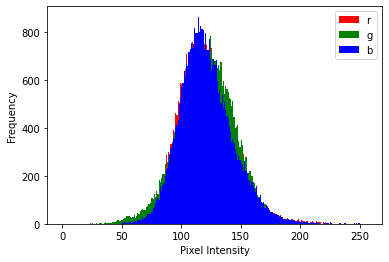

In [31]:
X0_0 = X_ZCA_c[:,0]
X1_1 = X_ZCA_c[:,1]
X2_2 = X_ZCA_c[:,2]
plt.hist(X0_0,256,[0,256], color = 'r',label = 'r')
plt.hist(X1_1,256,[0,256], color = 'g', label = 'g')
plt.hist(X2_2,256,[0,256], color = 'b', label ='b')
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Pixel Intensity")
plt.show()

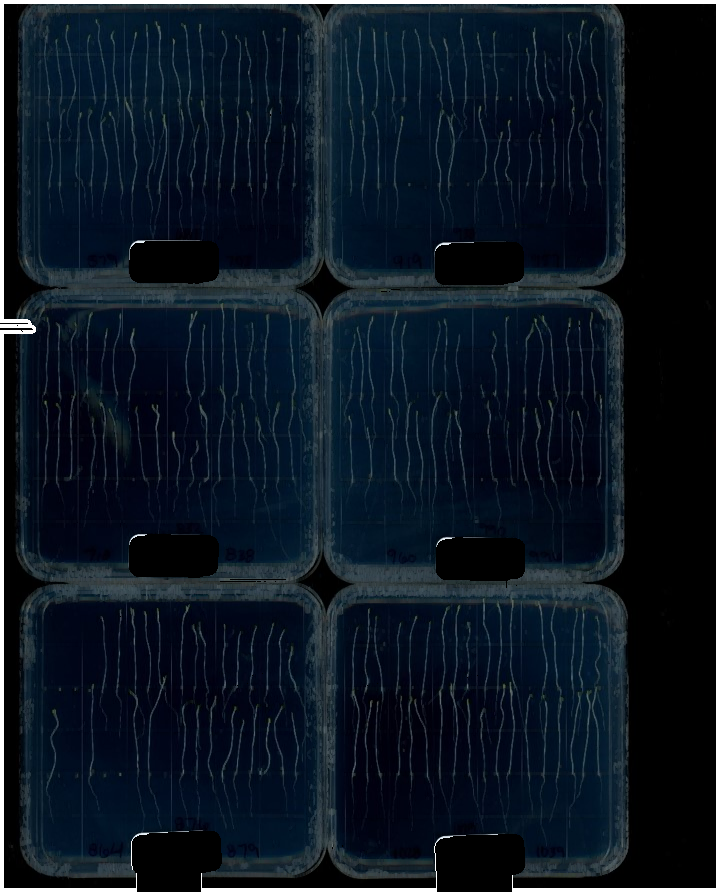

-1

In [7]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/eia/1.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
mask = np.ones(image.shape[:2], dtype="uint8") * 255
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 5)
  

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,20))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 1)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,3))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)
result = cv2.bitwise_and(result, result, mask=remove_horizontal)
result = cv2.bitwise_and(result, result, mask=remove_vertical)
#cv2_imshow(thresh)
#cv2_imshow( detected_lines)
#cv2_imshow( remove_vertical)
cv2_imshow( result)
#cv2_imshow( result)
cv2.waitKey()

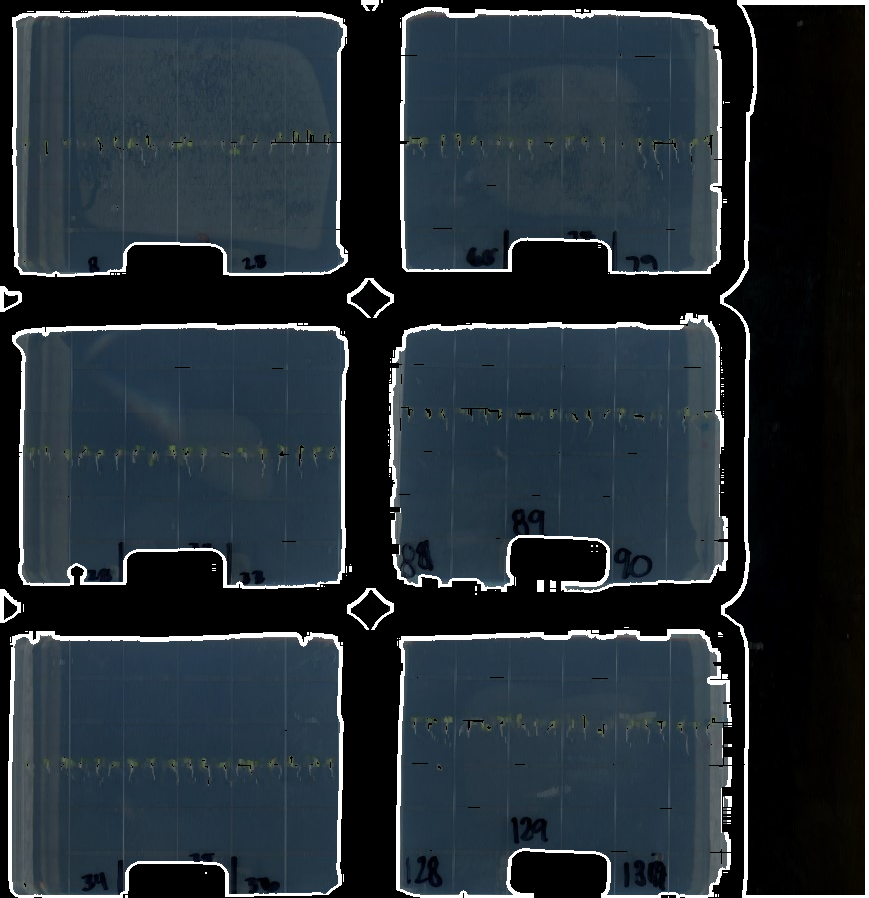

-1

In [16]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/eia/2.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
mask = np.ones(image.shape[:2], dtype="uint8") * 255
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 1)
  

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 5)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)
result = cv2.bitwise_and(result, result, mask=remove_horizontal)
result = cv2.bitwise_and(result, result, mask=remove_vertical)
#cv2_imshow(thresh)
#cv2_imshow( detected_lines)
#cv2_imshow( remove_vertical)
cv2_imshow( result)
#cv2_imshow( result)
cv2.waitKey()